In [1]:
# !git clone https://github.com/Jsrsky/machine_unlearning_experiments
# %cd machine_unlearning_experiments/experiments/mnist/naive

Cloning into 'machine_unlearning_experiments'...
remote: Enumerating objects: 189, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 189 (delta 63), reused 153 (delta 44), pack-reused 0 (from 0)
Receiving objects: 100% (189/189), 26.58 MiB | 27.50 MiB/s, done.
Resolving deltas: 100% (63/63), done.
/kaggle/working/machine_unlearning_experiments/experiments/mnist/naive


## Dependecies

In [9]:
import sys
from pathlib import Path
from torchvision import datasets

## Utils

In [10]:
project_root = Path.cwd().resolve().parents[2]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
    
data_root = project_root / 'data'
data_root.mkdir(parents=True, exist_ok=True)

from notebook_setup import setup_notebook
setup_notebook()

Notebook setup completed. Project root added to sys.path: D:\Machine_unlearning_masters


In [11]:
# Device configuration
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

# Set random seed for reproducibility
from utils.utils import set_seed
set_seed()

# Prepare Dataloaders
from methods.naive.naive_utils import init_dataloaders

# Train loop
from utils.train_test_metrics import train_model

# Plot losses
from utils.train_test_metrics import plot_training_history

# Test function
from utils.train_test_metrics import test_model

# Merics 
from utils.train_test_metrics import show_metrics

# Init model
from models.simple_cnn import init_model_cnn

Device used: cpu


## Parameters (arbitrary chosen)

In [12]:
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EPOCHS = 10

# Simple base training

## Init model

In [5]:
model, model_name, criterion, optimizer, transform = init_model_cnn(learning_rate=LEARNING_RATE)

Init model...
Done initializing model.
Model ID: 2616509748512, Optimizer ID: 2616510603504, Criterion ID: 2616520761440


## Init dataloaders

In [6]:
train_dataset = datasets.MNIST(root=data_root, train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root=data_root, train=False, transform=transform, download=True)
data_split_path = 'mnist_data_splits.json'

train_loader, val_loader, test_loader, classes = init_dataloaders(
    datasets=(train_dataset, test_dataset), 
    val_ratio=0.2,
    batch_size=BATCH_SIZE,
    info_file_path = data_split_path, 
    )

Prepare DataLoaders...
Done preparing DataLoaders.


## Call train

In [8]:
train_model(model, model_name, train_loader, val_loader, criterion, optimizer, num_epochs=EPOCHS)

Evaluating on validation set...: 100%|██████████| 375/375 [00:02<00:00, 168.50it/s]


Epoch [1/10], Train Loss: 0.1487, Train Accuracy: 0.9550, Val Loss: 0.0622, Val Accuracy: 0.9813
Epoch 1: New best validation accuracy: 0.9813. Model saved to CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 375/375 [00:02<00:00, 165.19it/s]


Epoch [2/10], Train Loss: 0.0466, Train Accuracy: 0.9854, Val Loss: 0.0466, Val Accuracy: 0.9862
Epoch 2: New best validation accuracy: 0.9862. Model saved to CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 375/375 [00:02<00:00, 169.31it/s]


Epoch [3/10], Train Loss: 0.0325, Train Accuracy: 0.9901, Val Loss: 0.0384, Val Accuracy: 0.9886
Epoch 3: New best validation accuracy: 0.9886. Model saved to CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 375/375 [00:02<00:00, 170.10it/s]


Epoch [4/10], Train Loss: 0.0231, Train Accuracy: 0.9924, Val Loss: 0.0522, Val Accuracy: 0.9848


Evaluating on validation set...: 100%|██████████| 375/375 [00:02<00:00, 170.00it/s]


Epoch [5/10], Train Loss: 0.0181, Train Accuracy: 0.9940, Val Loss: 0.0391, Val Accuracy: 0.9896
Epoch 5: New best validation accuracy: 0.9896. Model saved to CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 375/375 [00:02<00:00, 164.71it/s]


Epoch [6/10], Train Loss: 0.0143, Train Accuracy: 0.9952, Val Loss: 0.0462, Val Accuracy: 0.9883


Evaluating on validation set...: 100%|██████████| 375/375 [00:02<00:00, 166.39it/s]


Epoch [7/10], Train Loss: 0.0110, Train Accuracy: 0.9963, Val Loss: 0.0388, Val Accuracy: 0.9891


Evaluating on validation set...: 100%|██████████| 375/375 [00:02<00:00, 164.41it/s]


Epoch [8/10], Train Loss: 0.0090, Train Accuracy: 0.9972, Val Loss: 0.0623, Val Accuracy: 0.9846


Evaluating on validation set...: 100%|██████████| 375/375 [00:02<00:00, 157.24it/s]


Epoch [9/10], Train Loss: 0.0094, Train Accuracy: 0.9970, Val Loss: 0.0453, Val Accuracy: 0.9902
Epoch 9: New best validation accuracy: 0.9902. Model saved to CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 375/375 [00:02<00:00, 165.95it/s]

Epoch [10/10], Train Loss: 0.0065, Train Accuracy: 0.9978, Val Loss: 0.0433, Val Accuracy: 0.9902
Training complete for CNN_MNIST. Training stats saved to 'CNN_MNIST_history.json'.


## Plot history losses

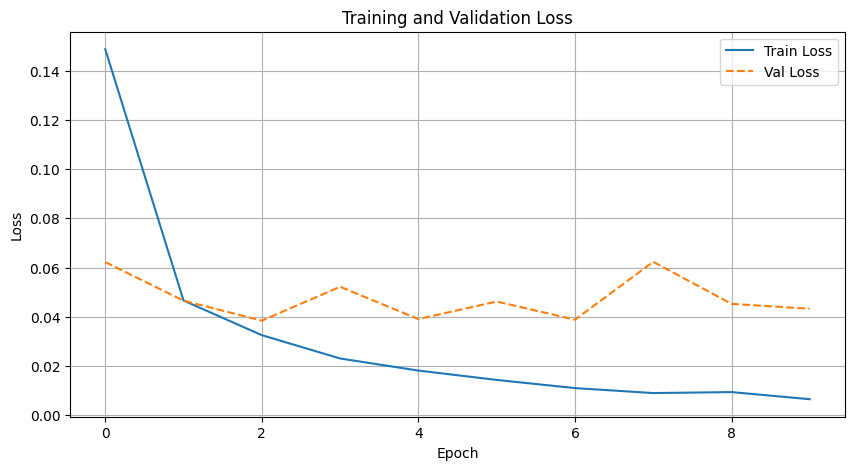

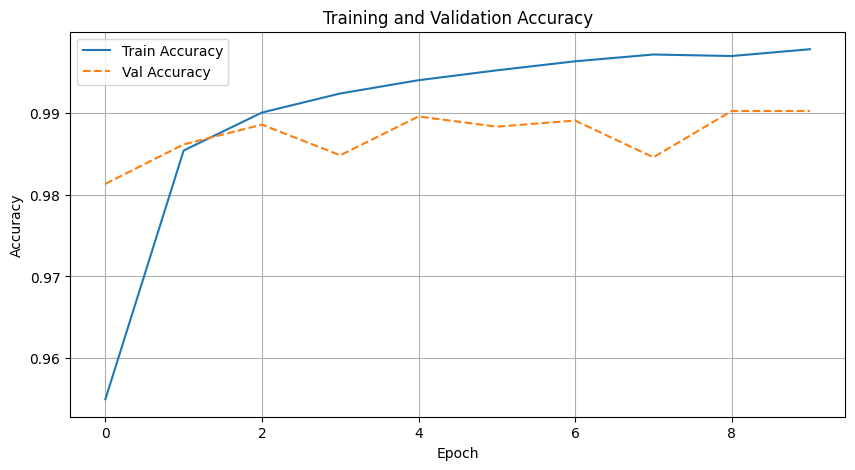

In [9]:
history_path = f'{model_name}_history.json'
plot_training_history(history_path)

## Call test

In [10]:
model_path = f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader)

Loading and testing model: CNN_MNIST


Evaluating model: CNN_MNIST_model.pth: 100%|██████████| 313/313 [00:01<00:00, 170.73it/s]

Predictions and labels saved to CNN_MNIST_predictions.json


## Show metrics

Metrics for CNN_MNIST:
  - Test Accuracy: 0.9909
  - Precision: 0.9909
  - Recall: 0.9909
  - F1 Score: 0.9909


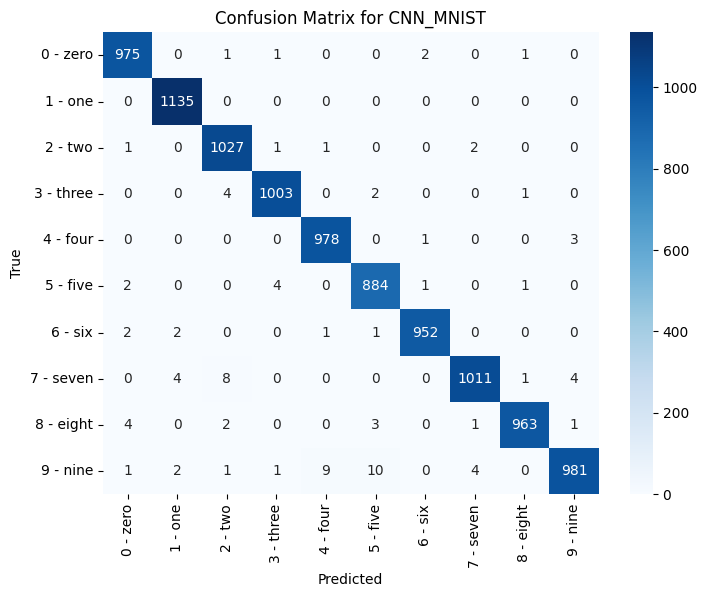

In [11]:
predictions_path = f'{model_name}_predictions.json'
# classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
show_metrics(predictions_path, classes, model_name)

## Utils naive

In [13]:
# Select samples to unlearn (10% random)
from utils.utils import select_samples_to_unlearn, select_targeted_samples_to_unlearn

# Update data splits
from methods.naive.naive_utils import update_splits_after_unlearning

# Recreate Dataloaders from json files
from methods.naive.naive_utils import recreate_dataloaders

# Naive unlearning

### Init new model

In [14]:
data_splits_file = "mnist_data_splits.json"
unlearn_samples_file = "2class_mnist_samples_to_unlearn.json"
updated_data_splits_path = "2class_updated_mnist_data_splits.json"

In [15]:
model, model_name, criterion, optimizer, transform = init_model_cnn(learning_rate=LEARNING_RATE)
model_name = "naive_unlearning_" + model_name

Init model...
Done initializing model.
Model ID: 2250223214544, Optimizer ID: 2250224325440, Criterion ID: 2250224327360


### Init data

In [16]:
dataset = datasets.MNIST(root=data_root, train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root=data_root, train=False, transform=transform, download=True)

## Select samples to unlearn

In [ ]:
#ONLY ONCE
# select_samples_to_unlearn(data_splits_file, unlearn_samples_file, unlearn_ratio=0.1, target_class=6)
# select_targeted_samples_to_unlearn(data_splits_file, unlearn_samples_file, [2688,123,40])

Unlearn indices (targeted) saved to 2class_mnist_samples_to_unlearn.json


## Update data splits -> delete samples

In [17]:
update_splits_after_unlearning(data_splits_file, unlearn_samples_file, updated_data_splits_path)

Updated splits saved to updated_mnist_data_splits.json


## Recreate DataLoaders from json files

In [18]:
train_loader, val_loader, test_loader, classes = recreate_dataloaders(
    data_splits_file=updated_data_splits_path,
    datasets=(train_dataset, test_dataset), 
    batch_size=BATCH_SIZE)

Recreating DataLoaders...
Done recreating DataLoaders.


## Re-train

In [19]:
train_model(model, model_name, train_loader, val_loader, criterion, optimizer, num_epochs=EPOCHS)

Evaluating on validation set...: 100%|██████████| 338/338 [00:02<00:00, 166.51it/s]


Epoch [1/10], Train Loss: 0.1536, Train Accuracy: 0.9531, Val Loss: 0.0638, Val Accuracy: 0.9805
Epoch 1: New best validation accuracy: 0.9805. Model saved to naive_unlearning_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 338/338 [00:02<00:00, 168.31it/s]


Epoch [2/10], Train Loss: 0.0488, Train Accuracy: 0.9845, Val Loss: 0.0572, Val Accuracy: 0.9828
Epoch 2: New best validation accuracy: 0.9828. Model saved to naive_unlearning_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 338/338 [00:02<00:00, 159.05it/s]


Epoch [3/10], Train Loss: 0.0336, Train Accuracy: 0.9887, Val Loss: 0.0412, Val Accuracy: 0.9890
Epoch 3: New best validation accuracy: 0.9890. Model saved to naive_unlearning_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 338/338 [00:02<00:00, 166.68it/s]


Epoch [4/10], Train Loss: 0.0226, Train Accuracy: 0.9929, Val Loss: 0.0446, Val Accuracy: 0.9864


Evaluating on validation set...: 100%|██████████| 338/338 [00:02<00:00, 163.72it/s]


Epoch [5/10], Train Loss: 0.0177, Train Accuracy: 0.9939, Val Loss: 0.0448, Val Accuracy: 0.9875


Evaluating on validation set...: 100%|██████████| 338/338 [00:02<00:00, 167.85it/s]


Epoch [6/10], Train Loss: 0.0138, Train Accuracy: 0.9956, Val Loss: 0.0606, Val Accuracy: 0.9858


Evaluating on validation set...: 100%|██████████| 338/338 [00:02<00:00, 168.02it/s]


Epoch [7/10], Train Loss: 0.0118, Train Accuracy: 0.9958, Val Loss: 0.0464, Val Accuracy: 0.9891
Epoch 7: New best validation accuracy: 0.9891. Model saved to naive_unlearning_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 338/338 [00:02<00:00, 165.60it/s]


Epoch [8/10], Train Loss: 0.0100, Train Accuracy: 0.9967, Val Loss: 0.0502, Val Accuracy: 0.9880


Evaluating on validation set...: 100%|██████████| 338/338 [00:02<00:00, 164.78it/s]


Epoch [9/10], Train Loss: 0.0085, Train Accuracy: 0.9971, Val Loss: 0.0472, Val Accuracy: 0.9879


Evaluating on validation set...: 100%|██████████| 338/338 [00:02<00:00, 166.69it/s]

Epoch [10/10], Train Loss: 0.0071, Train Accuracy: 0.9977, Val Loss: 0.0590, Val Accuracy: 0.9892
Epoch 10: New best validation accuracy: 0.9892. Model saved to naive_unlearning_CNN_MNIST_model.pth.
Training complete for naive_unlearning_CNN_MNIST. Training stats saved to 'naive_unlearning_CNN_MNIST_history.json'.


## Plot history losses

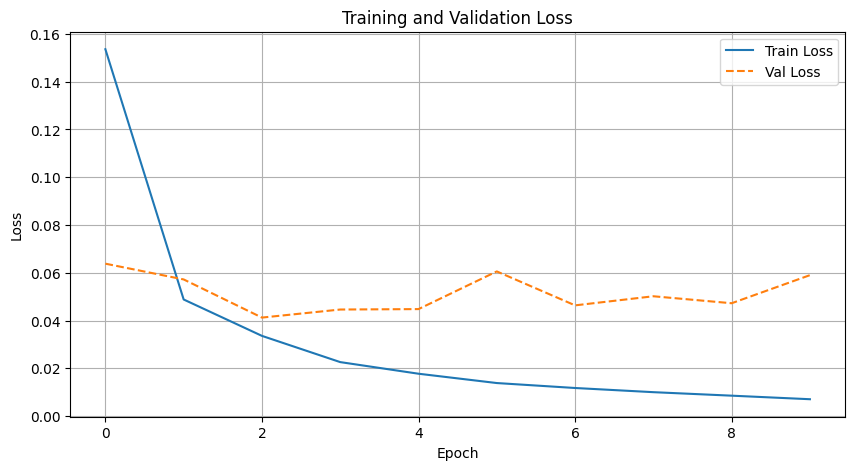

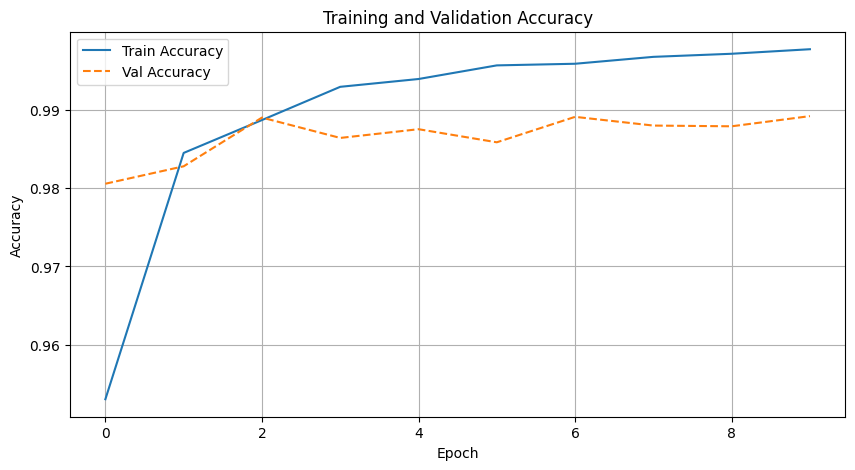

In [20]:
history_path = f'{model_name}_history.json'
plot_training_history(history_path)

## Re-test

In [21]:
model_path = f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader)

Loading and testing model: naive_unlearning_CNN_MNIST


Evaluating model: naive_unlearning_CNN_MNIST_model.pth: 100%|██████████| 313/313 [00:01<00:00, 167.08it/s]


Predictions and labels saved to naive_unlearning_CNN_MNIST_predictions.json


## Show metrics

Metrics for naive_unlearning_CNN_MNIST:
  - Test Accuracy: 0.9896
  - Precision: 0.9896
  - Recall: 0.9896
  - F1 Score: 0.9896


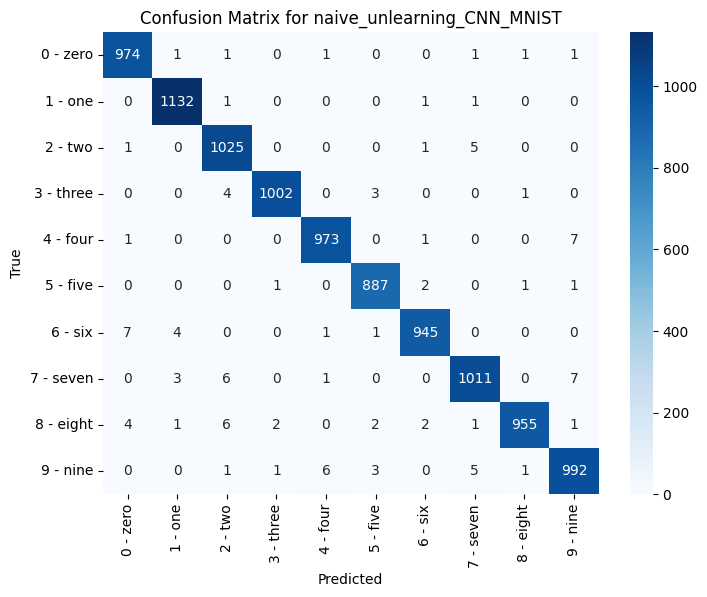

In [22]:
predictions_path = f'{model_name}_predictions.json'
# classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
show_metrics(predictions_path, classes, model_name)